# US Income Analysis
---

The following notebooks explores and visualizes the distribution for Top 10 and Bottom 10 Average US income states.

We will look at various attributes that determine whether or not US Adults have a salary of more or less than 50k.

In [134]:
# Dependencies 
import pandas as pd
import numpy as np
import os
path = os.getcwd()
import matplotlib.pyplot as plt
import matplotlib
#from mpl_toolkits.basemap import Basemap

In [13]:
# Create pandas dataframe
top_10 = pd.read_csv(path+'/clean_data_files/top_10.csv')
bottom_10 = pd.read_csv(path+'/clean_data_files/bottom_10.csv')
adult_income = pd.read_csv(path+'/clean_data_files/us_adult_income.csv')

### Value Counts: Top 10 States

In [4]:
top_10['State_Name'].value_counts()

California              3280
New York                2160
New Jersey               888
Virginia                 785
Massachusetts            670
Maryland                 586
Connecticut              355
Hawaii                   138
Alaska                   105
District of Columbia      64
Name: State_Name, dtype: int64

### Value Counts: Bottom 10 States

In [5]:
bottom_10['State_Name'].value_counts()

Alabama           526
Louisiana         511
Kentucky          497
Oklahoma          480
South Carolina    459
Puerto Rico       380
Arkansas          340
Mississippi       321
West Virginia     248
Idaho             149
Name: State_Name, dtype: int64

# California vs Alabama
---

The dataset contains more income information for California and Alabama; therefore, we will focus on average incomes for the two.

### What does the average income distribution look like in California?

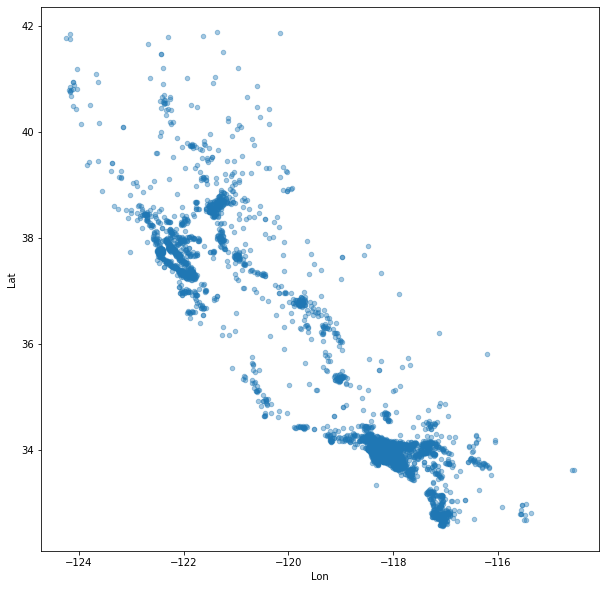

In [125]:
california = top_10.loc[top_10['State_Name'] == 'California']
california.plot(kind="scatter", x="Lon", y="Lat", alpha=0.4,figsize=(10,10))
plt.savefig(path+'/Graphs/california_geo_income_map.png')
plt.show()

### What are the Top 5 Cities in California with the highest Average Income?

In [7]:
top_cities = california.groupby('City').mean()['Mean'].to_frame()
top_cities.sort_values('Mean',ascending=False).head(5)

Mean
City                    
Agoura Hills    182475.0
Portola Valley  177665.0
Hillsborough    173210.0
Moraga          171929.0
Los Altos       165306.8

### What does the average income distribution look like in Alabama?

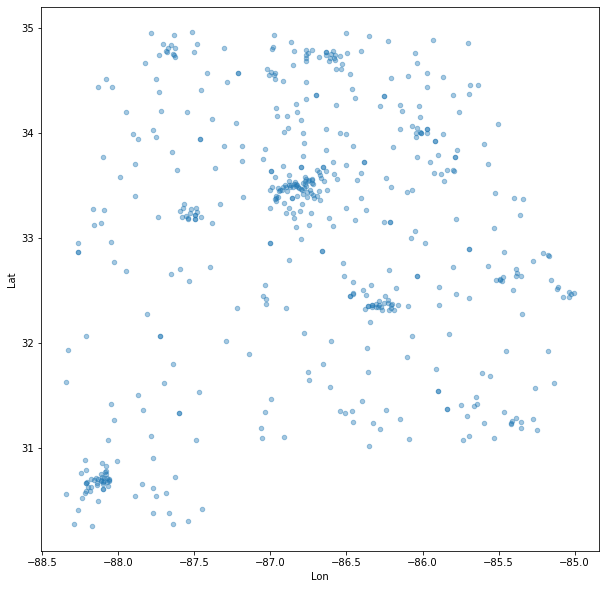

In [126]:
alabama = bottom_10.loc[bottom_10['State_Name'] == 'Alabama']
alabama.plot(kind="scatter", x="Lon", y="Lat", alpha=0.4,figsize=(10,10))
plt.savefig(path+'/Graphs/alabama_geo_income_map.png')
plt.show()

### What are the Bottom 5 Cities in Alabama with the lowest Average Income?

In [9]:
top_cities = alabama.groupby('City').mean()['Mean'].to_frame()
top_cities.sort_values('Mean',ascending=True).head(5)

Mean
City                 
Vincent           0.0
Wadley        14741.0
Tarrant       18813.0
Childersburg  20842.0
Whistler      24218.0

## Are there differences in Income between Races?

In [53]:
# Create two dataframes to determine whites vs non-whites information
whites = adult_income.loc[adult_income['race'] == 'White']
non_whites = adult_income.loc[adult_income['race'] != 'White']

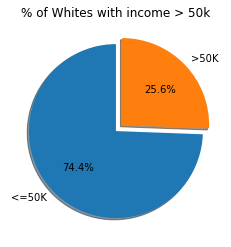

In [127]:
# Determine value counts
whites_count = whites.groupby('income').count()['race'].to_frame().reset_index()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '<=50K', '>50K'
sizes = whites_count['race']
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("% of Whites with income > 50k")
plt.savefig(path+'/Graphs/%_of_whites.png')
plt.show()

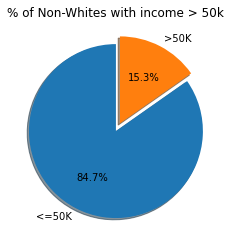

In [128]:
# Determine value counts
non_whites_count = non_whites.groupby('income').count()['race'].to_frame().reset_index()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '<=50K', '>50K'
sizes = non_whites_count['race']
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("% of Non-Whites with income > 50k")
plt.savefig(path+'/Graphs/%_of_non_whites.png')
plt.show()

## What are there differences in Income between Genders?

In [80]:
# Create two dataframes to determine whites vs non-whites information
male = adult_income.loc[adult_income['sex'] == 'Male']
female = adult_income.loc[adult_income['sex'] == 'Female']

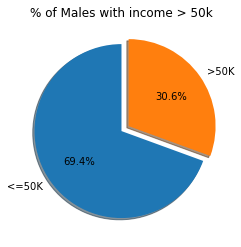

In [129]:
# Determine value counts
male_count = male.groupby('income').count()['sex'].to_frame().reset_index()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '<=50K', '>50K'
sizes = male_count['sex']
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("% of Males with income > 50k")
plt.savefig(path+'/Graphs/%_of_males.png')
plt.show()

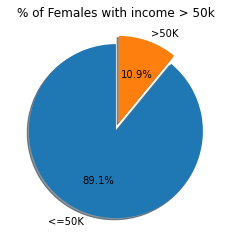

In [130]:
# Determine value counts
female_count = female.groupby('income').count()['sex'].to_frame().reset_index()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '<=50K', '>50K'
sizes = female_count['sex']
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("% of Females with income > 50k")
plt.savefig(path+'/Graphs/%_of_females.png')
plt.show()

## How do work hours compare against different age groups?

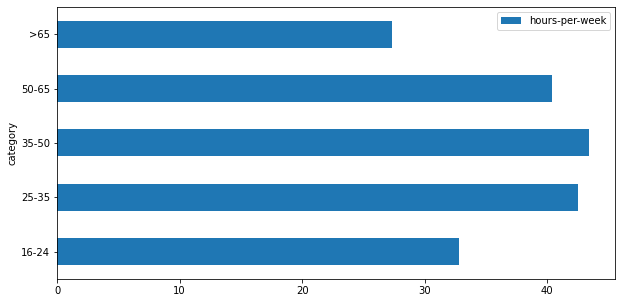

In [132]:
# Create a new column in order to group by age
age['category'] = pd.cut(age.age,bins=[16,25,35,50,65,90],labels=['16-24','25-35','35-50','50-65','>65'])
age.groupby('category').mean()['hours-per-week'].to_frame().plot(kind='barh',figsize=(10,5))
plt.savefig(path+'/Graphs/age_group_work_hours.png')
plt.show()